# Visualização e exploração de dados em Python


por **Cibele Russo** 

**ICMC/USP - São Carlos SP**




Alguns vídeos complementares sugeridos:

- Análise descritiva em Python - Uma aplicação (Prof. Cibele Russo) https://www.youtube.com/watch?v=R44jbSmpjgg

- Análise Exploratória de dados: Medidas Resumo (Prof. Francisco Rodrigues) https://www.youtube.com/watch?v=bD2UYs1w_s4





## Programa

a. Medidas de posição ou localização

b. Medidas de dispersão

c. Apresentação tabular

d. Representação Gráfica

e. Assimetria e curtose

## Pacotes que serão utilizados

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import statistics

## Aplicação com visualização e exploração de dados

Considere os dados de 100 mil clientes de um banco no arquivo dados_banco.csv. Estão disponíveis as variáveis:

- Cliente: Identificador do cliente.
- Sexo: Feminino (F) ou Masculino (M)
- Idade: Idade do cliente, em anos completos.
- Empresa: Tipo da empresa em que trabalha: Pública, Privada ou Autônomo
- Salário: Salário declarado pelo cliente na abertura da conta, em reais.
- Saldo_cc: Saldo em conta corrente, em reais.
- Saldo_poupança: Saldo em poupança, em reais.
- Saldo_investimento: Saldo em investimentos, em reais.
- Devedor_cartao: Valor em atraso no cartão de crédito, em reais.
- Inadimplente: Se o cliente é considerado inadimplente atualmente (1) ou não (0), de acordo com critérios preestabelecidos.


Faremos uma introdução à visualização e exploração dos dados. 

In [1]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

%matplotlib inline

# Modifique o diretório para fazer a leitura dos dados em dados_banco.csv

pkgdir = '/home/cibele/Google Drive/Disciplinas/!2021 Visualização e Exploração de Dados/Comandos R'

# Dados banco - Leitura dos dados
dados = pd.read_csv(f'{pkgdir}/dados_banco.csv', index_col=0, decimal=',')
 
dados

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
1,1,M,33,Privada,6019,1084.98,0.00,0.00,1214.35,0
2,2,F,31,Pública,5134,532.09,0.00,0.00,1662.96,0
3,3,M,31,Pública,5286,719.91,0.00,0.00,2167.97,0
4,4,F,32,Privada,5534,547.47,0.00,0.00,639.13,1
5,5,F,28,Autônomo,4559,412.81,0.00,0.00,1466.96,1
...,...,...,...,...,...,...,...,...,...,...
99996,99996,F,31,Autônomo,5246,650.93,0.00,0.00,2083.84,1
99997,99997,M,32,Privada,5678,877.58,16881.08,9482.21,0.00,0
99998,99998,M,31,Pública,5430,627.46,0.00,0.00,1239.22,0
99999,99999,F,30,Pública,5070,573.75,0.00,0.00,3427.16,0


In [5]:
dados.head()

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
1,1,M,33,Privada,6019,1084.98,0.0,0.0,1214.35,0
2,2,F,31,Pública,5134,532.09,0.0,0.0,1662.96,0
3,3,M,31,Pública,5286,719.91,0.0,0.0,2167.97,0
4,4,F,32,Privada,5534,547.47,0.0,0.0,639.13,1
5,5,F,28,Autônomo,4559,412.81,0.0,0.0,1466.96,1


### Classificação das variáveis por tipo

- Sexo: qualitativa nominal
- Idade: quantitativa contínua
- Empresa: qualitativa nominal
- Salário: quantitativa contínua
- Saldo_cc: quantitativa contínua
- Saldo_poupança: quantitativa contínua
- Saldo_investimento: quantitativa contínua
- Devedor_cartão: quantitativa contínua
- Inadimplente: qualitativa nominal (embora numérica)

### Tabela de frequências (absolutas e relativas)
(para a Empresa, repetir para outras variáveis qualitativas)

In [6]:
# Tabela de frequências absolutas

tab = pd.crosstab(index=dados['Empresa'], columns='count')

tab

col_0,count
Empresa,
Autônomo,14206
Privada,61624
Pública,24170


In [7]:
tab = pd.crosstab(index=dados['Empresa'], columns='count')

# Tabela de frequências relativas
tab/tab.sum()


col_0,count
Empresa,
Autônomo,0.14206
Privada,0.61624
Pública,0.24170


**Análise:** Na base de dados, cerca de 62% dos clientes trabalham em empresas privadas, 24% em empresas públicas e 14% são autônomos.

### Medidas resumo
(para a idade, poderia repetir para as outras variáveis quantitativas)

In [8]:
# Média

dados['Idade'].mean()

31.83236

In [9]:
# Mediana

dados['Idade'].median()

32.0

In [10]:
# Desvio-padrão

dados['Idade'].std()

2.9277196836161856

In [11]:
# Média de idade por grupos

dados.groupby('Sexo')['Idade'].mean()

Sexo
F    30.147903
M    33.044399
Name: Idade, dtype: float64

**Análise:** A média de idade nos dados é 31.8 anos, a mediana é 32 anos. O desvio-padrão da idade na base de dados geral é 2.93 anos. Entre mulheres, a média de idade é 30.1 anos e entre homens, 33 anos. 

In [12]:
# Média de idade por grupos

dados.groupby('Empresa')['Idade'].mean()

Empresa
Autônomo    29.264184
Privada     32.865523
Pública     30.707654
Name: Idade, dtype: float64

**Análise:** A média de idade entre os clientes autônomos é de 29.3 anos, entre clientes que trabalham em empresas privadas é 32.9 anos e para clientes que trabalham em empresas públicas é 30.7 anos.

In [13]:
# Moda - para a Empresa
import statistics

statistics.mode(dados['Empresa'])



'Privada'

**Análise:** Na base de dados, o tipo de empresa mais comum é a empresa privada.

In [14]:
# Ordenação dos dados

np.sort(dados['Idade'])

array([21, 21, 21, ..., 55, 56, 56])

In [15]:
# Quantis de 95% e 25%

np.percentile(dados['Idade'],95)

37.0

In [16]:
np.percentile(dados['Idade'],25)

30.0

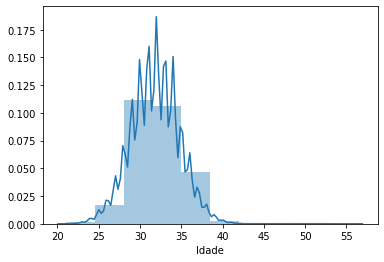

In [20]:
sns.distplot(dados['Idade'], bins=10)

### Estatísticas descritivas dos dados com describe()

In [21]:
dados.describe()

,Cliente,Idade,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,31.83236,5513.453080,836.530683,2213.296334,1471.116085,2408.638706,0.24359
std,28867.657797,2.92772,392.083661,238.691071,5650.814769,3914.558428,1659.405630,0.42925
min,1.000000,21.00000,4359.000000,-280.670000,0.000000,0.000000,0.000000,0.00000
25%,25000.750000,30.00000,5235.000000,675.290000,0.000000,0.000000,1100.242500,0.00000
50%,50000.500000,32.00000,5530.000000,835.050000,0.000000,0.000000,2463.965000,0.00000
75%,75000.250000,34.00000,5766.000000,996.560000,0.000000,0.000000,3602.510000,0.00000
max,100000.000000,56.00000,9080.000000,2340.650000,27329.110000,22803.560000,10281.780000,1.00000


In [22]:
dados.loc[:,dados.columns != 'Cliente'].describe()

,Idade,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,31.83236,5513.453080,836.530683,2213.296334,1471.116085,2408.638706,0.24359
std,2.92772,392.083661,238.691071,5650.814769,3914.558428,1659.405630,0.42925
min,21.00000,4359.000000,-280.670000,0.000000,0.000000,0.000000,0.00000
25%,30.00000,5235.000000,675.290000,0.000000,0.000000,1100.242500,0.00000
50%,32.00000,5530.000000,835.050000,0.000000,0.000000,2463.965000,0.00000
75%,34.00000,5766.000000,996.560000,0.000000,0.000000,3602.510000,0.00000
max,56.00000,9080.000000,2340.650000,27329.110000,22803.560000,10281.780000,1.00000


### Gráfico de setores (pizza)

- https://blog.algorexhealth.com/2018/03/almost-10-pie-charts-in-10-python-libraries/



In [23]:
tab1 = pd.crosstab(index=dados['Sexo'], columns='count')
tab1/tab1.sum()

col_0,count
Sexo,
F,0.41845
M,0.58155


In [24]:
tab1

col_0,count
Sexo,
F,41845
M,58155


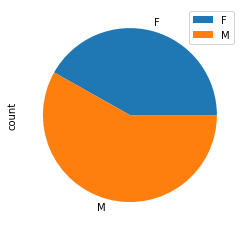

In [25]:
plot = tab1.plot.pie(y='count')

In [28]:
# Tabela de frequências absolutas

tab1 = pd.crosstab(index=dados['Sexo'], columns='count')

tab1

col_0,count
Sexo,
F,41845
M,58155


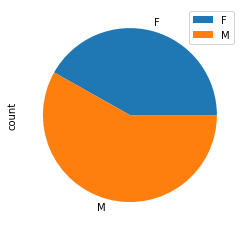

In [29]:
plot = tab1.plot.pie(y='count')

### Gráfico de barras

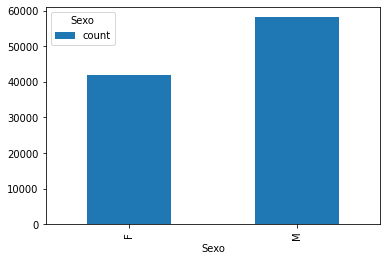

In [31]:
tab1.plot.bar()
plt.legend(title='Sexo')

plt.show()

### Boxplot

- Posição
- Dispersão
- Outliers
- Assimetria

https://seaborn.pydata.org/generated/seaborn.boxplot.html



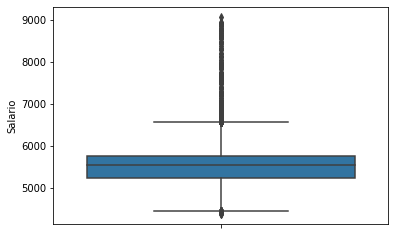

In [33]:
sns.boxplot(x=dados['Salario'],orient='v')

**Histograma**

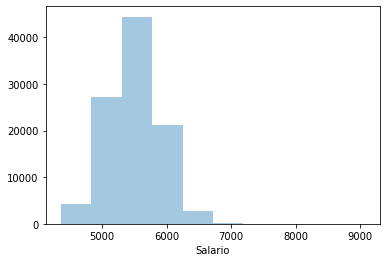

In [34]:
sns.distplot(dados['Salario'],kde=False, bins=10)

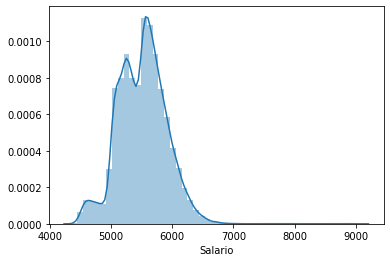

In [35]:
sns.distplot(dados['Salario'])

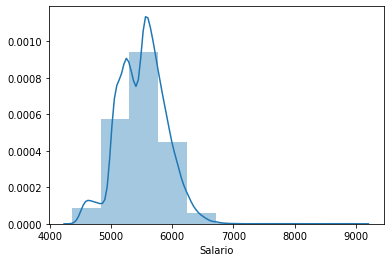

In [36]:
sns.distplot(dados['Salario'], bins=10)

**Densidade alisada**

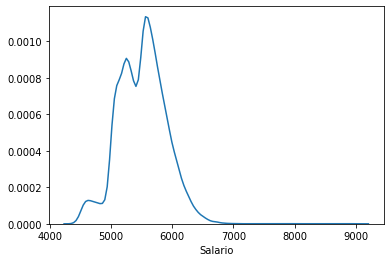

In [37]:
sns.distplot(dados['Salario'], hist=False)

### Boxplots por grupos

Text(0, 0.5, 'Salário')

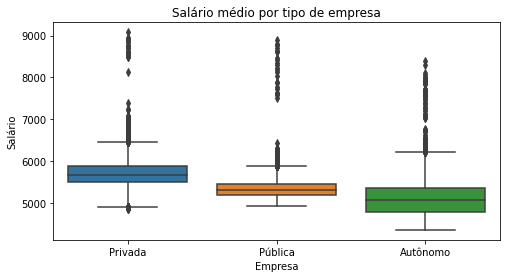

In [41]:
# Salário médio por tipo de empresa


# Estabelecendo o tamanho do gráfico
plt.figure(figsize=(8,4))

# Título
plt.title("Salário médio por tipo de empresa")

# Gráfico de barras com salário médio por tipo de empresa
sns.boxplot(x=dados['Empresa'], y=dados['Salario'])

# Label para eixo vertical
plt.ylabel("Salário")



## Medidas de posição e assimetria dos dados

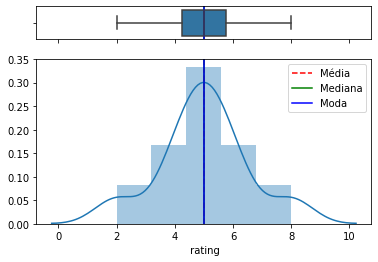

In [42]:
# Ilustração das medidas média, moda, mediana para dados simétricos
# Adaptado de https://stackoverflow.com/questions/51417483/mean-median-mode-lines-showing-only-in-last-graph-in-seaborn/51417635


df = pd.DataFrame({" rating": [2, 4, 4, 5, 5, 5, 5, 6, 6, 8 ], "dummy": range(10)})

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df[' rating'].mean()
median=df[' rating'].median()
mode = statistics.mode(df[' rating'])

sns.boxplot(df[" rating"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(df[" rating"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--', label='Média')
ax_hist.axvline(median, color='g', linestyle='-', label='Mediana')
ax_hist.axvline(mode, color='b', linestyle='-', label='Moda')


plt.legend()


ax_box.set(xlabel='')
plt.show()

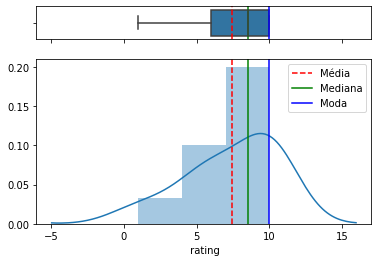

In [43]:
# Ilustração das medidas média, moda, mediana para dados assimétricos à esquerda ou com assimetria negativa
# Adaptado de: https://stackoverflow.com/questions/51417483/mean-median-mode-lines-showing-only-in-last-graph-in-seaborn/51417635


from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import statistics

df = pd.DataFrame({" rating": [1, 4, 6, 6,  7, 10, 10, 10, 10, 10], "dummy": range(10)})

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df[' rating'].mean()
median=df[' rating'].median()
mode = statistics.mode(df[' rating'])

sns.boxplot(df[" rating"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')


sns.distplot(df[" rating"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--', label='Média')
ax_hist.axvline(median, color='g', linestyle='-', label='Mediana')
ax_hist.axvline(mode, color='b', linestyle='-', label='Moda')

plt.legend()


ax_box.set(xlabel='')
plt.show()

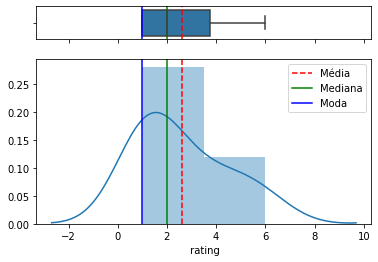

In [44]:
# Ilustração das medidas média, moda, mediana para dados assimétricos à direita ou com assimetria positiva
# Adaptado de: https://stackoverflow.com/questions/51417483/mean-median-mode-lines-showing-only-in-last-graph-in-seaborn/51417635


from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import statistics

df = pd.DataFrame({" rating": [1, 1, 1, 1, 2, 2, 3, 4, 5, 6], "dummy": range(10)})

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df[' rating'].mean()
median=df[' rating'].median()
mode = statistics.mode(df[' rating'])

sns.boxplot(df[" rating"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(df[" rating"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--', label='Média')
ax_hist.axvline(median, color='g', linestyle='-', label='Mediana')
ax_hist.axvline(mode, color='b', linestyle='-', label='Moda')

plt.legend()

ax_box.set(xlabel='')
plt.show()

### Curtose




In [45]:
from scipy.stats import norm, kurtosis

data = norm.rvs(size=100000)

kurtosis(data)


-0.008576298023018403

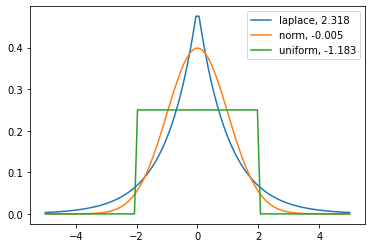

In [46]:
# Referência: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html

import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kurtosis
import numpy as np


x = np.linspace(-5, 5, 100)
ax = plt.subplot()
distnames = ['laplace', 'norm', 'uniform']



for distname in distnames:
    if distname == 'uniform':
        dist = getattr(stats, distname)(loc=-2, scale=4)
    else:
        dist = getattr(stats, distname)
    data = dist.rvs(size=1000)
    kur = kurtosis(data, fisher=True)
    y = dist.pdf(x)
    ax.plot(x, y, label="{}, {}".format(distname, round(kur, 3)))
    ax.legend()
    
    
    
# Normal: mesocúrtica
# Laplace: leptocúrtica
# Uniforme: platicúrtica